In [129]:
!pip install graphviz dtreeviz
from sklearn.model_selection import cross_val_score
import graphviz, pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns
from pandas.plotting import scatter_matrix 
from sklearn import model_selection, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from dtreeviz.trees import *
from IPython.core.display import display, HTML
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import svm, preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import VotingClassifier
from collections import Counter
sns.set(style="ticks", color_codes=True)

In [57]:
train=pd.read_excel('Data_Latih_BDC.xlsx')
test = pd.read_excel('Data_Uji_BDC.xlsx')
tambah=pd.read_csv('judul_clean.csv')
train.head()

,ID,label,tanggal,judul,narasi,nama file gambar
0,71,1,2020-08-17 00:00:00,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg
1,495,1,2020-07-13 00:00:00,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,495.png
2,550,1,2020-07-08 00:00:00,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",550.png
3,1161,1,2020-05-05 00:00:00,MEREKA SUDAH MEMPERSIAPKAN DIRI DENGAN BAIK UN...,LIHATLAH MEREKA SUDAH MEMPERSIAPKAN DIRI DENGA...,1161.png
4,1597,1,2020-03-24 00:00:00,Foto Presiden Italia menangis karena tak cukup...,Italia punya fasilitas perawatan kesehatan ter...,1597.png


In [58]:
train['text'] = train['judul'] + ' ' + train['narasi']
test['text'] = test['judul'] + ' ' + test['narasi']

In [59]:
train.head()

,ID,label,tanggal,judul,narasi,nama file gambar,text
0,71,1,2020-08-17 00:00:00,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg,Pemakaian Masker Menyebabkan Penyakit Legionna...
1,495,1,2020-07-13 00:00:00,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,495.png,Foto Jim Rohn: Jokowi adalah presiden terbaik ...
2,550,1,2020-07-08 00:00:00,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",550.png,"ini bukan politik, tapi kenyataan Pak Jokowi b..."
3,1161,1,2020-05-05 00:00:00,MEREKA SUDAH MEMPERSIAPKAN DIRI DENGAN BAIK UN...,LIHATLAH MEREKA SUDAH MEMPERSIAPKAN DIRI DENGA...,1161.png,MEREKA SUDAH MEMPERSIAPKAN DIRI DENGAN BAIK UN...
4,1597,1,2020-03-24 00:00:00,Foto Presiden Italia menangis karena tak cukup...,Italia punya fasilitas perawatan kesehatan ter...,1597.png,Foto Presiden Italia menangis karena tak cukup...


In [60]:
train_ = train.drop(columns=['ID', 'tanggal','judul', 'narasi', 'nama file gambar'])
test_ = test.drop(columns=['ID', 'tanggal','judul', 'narasi', 'nama file gambar'])

print(train_.head())


   label                                               text
0      1  Pemakaian Masker Menyebabkan Penyakit Legionna...
1      1  Foto Jim Rohn: Jokowi adalah presiden terbaik ...
2      1  ini bukan politik, tapi kenyataan Pak Jokowi b...
3      1  MEREKA SUDAH MEMPERSIAPKAN DIRI DENGAN BAIK UN...
4      1  Foto Presiden Italia menangis karena tak cukup...


In [61]:
print(test_.head())

                                                text
0  Uang Rp75.000 Bukan untuk Alat Tukar Kado Pran...
1  Indonesia Akan Adakan Program 1 Suami 2 Istri ...
2  Ketik GRATULA untuk memastikan akaun facebook ...
3  FBI menggrebek sinagoge Yahudi di New York, te...
4  : Wali Kota Pekalongan Meninggal Setelah Segel...


In [62]:
train1 = train_.copy()
test1 = test_.copy()

In [63]:
tambah.head()

,Unnamed: 0,label,text
0,0,0.0,Klarifikasi Gedung DPR Tidak Terjadi Kebakaran
1,1,0.0,“Cairan dalam Wadah Mainan Anak yang Menyerupa...
2,2,0.0,Kemenag Bantah Edaran Surat Guru Madrasah Waji...
3,3,0.0,[BENAR]: Metro TV Klarifikasi Tayangan Quick C...
4,4,0.0,PT KCI Mengklarifikasi Kabar Tiket Kertas Grat...


In [64]:
tambah_ = tambah.drop(columns=['Unnamed: 0'])
tambah_.head()

,label,text
0,0.0,Klarifikasi Gedung DPR Tidak Terjadi Kebakaran
1,0.0,“Cairan dalam Wadah Mainan Anak yang Menyerupa...
2,0.0,Kemenag Bantah Edaran Surat Guru Madrasah Waji...
3,0.0,[BENAR]: Metro TV Klarifikasi Tayangan Quick C...
4,0.0,PT KCI Mengklarifikasi Kabar Tiket Kertas Grat...


In [65]:
df = train1.append(tambah)
df.shape

(4548, 3)

In [86]:
df.to_csv('coba')

In [70]:
#df = df.drop(columns=['Unnamed: 0'])
df.tail()

,label,text
394,0.0,Klarifikasi Polres Bogor Terkait Pembuatan SIM...
395,0.0,Ketua INASGOC Bantah Indonesia Bermain Curang ...
396,0.0,Klarifikasi “Kenapa sholat di tempat ibadah ag...
397,0.0,Polisi Mengklarifikasi Bahwa Tidak Ada Bom di ...
398,0.0,“Ormas Projo Bantah Keluarkan Surat Aksi Kiri ...


In [72]:
df.to_csv('data.csv')

In [74]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, numpy as np, seaborn as sns; sns.set()
import requests
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from sklearn.decomposition import LatentDirichletAllocation as LDA
import re, matplotlib.pyplot as plt, os
import itertools
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from html import unescape
from nltk import sent_tokenize
from unidecode import unidecode
from urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)
from requests.packages.urllib3.exceptions import InsecureRequestWarning
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from spacy.lang.id import Indonesian
from nltk.tag import CRFTagger
import spacy
nlp_en = spacy.load("en_core_web_sm")

nlp_id = Indonesian();ct = CRFTagger()  # Language Model
fTagger = 'all_indo_man_tag_corpus_model.crf.tagger'
ct.set_model_file(fTagger)
    
def NLPfilter(t, filters):
    # filters = set(['NN', 'NNP', 'NNS', 'NNPS', 'JJ'])
    tokens = nlp_id(t)
    tokens = [str(k) for k in tokens if len(k)>2]
    hasil = ct.tag_sents([tokens])
    return [k[0] for k in hasil[0] if k[1] in filters]

def compute_coherence_values(dictionary, corpus, texts, limit, coherence='c_v', start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence=coherence)
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

def loadCorpus(file='', sep=':', dictionary = True):
    file = open(file, 'r', encoding="utf-8", errors='replace')
    F = file.readlines()
    file.close()
    if dictionary:
        fix = {}
        for f in F:
            k, v = f.split(sep)
            k, v = k.strip(), v.strip()
            fix[k] = v
    else:
        fix = set( (w.strip().replace('\ufeff','') for w in F) )
    return fix

def cleanCorpus(file=''):
    f = open(file, 'r', encoding="utf-8", errors='replace')
    F = f.readlines()
    f.close()
    fix = set( (w.strip() for w in F) )
    fix = list(fix)
    fix.sort()
    with open(file, 'w') as f:
        for kata in fix:
            try:
                f.write(kata+'\n')
            except:
                pass
    print(fix[:5], '\n', fix[-5:])
    return True

def LoadStopWords(lang='en'):
    L = lang.lower().strip()
    if L == 'en' or L == 'english' or L == 'inggris':
        from spacy.lang.en import English as lemmatizer
        #lemmatizer = spacy.lang.en.English
        lemmatizer = lemmatizer()
        #lemmatizer = spacy.load('en')
        stops =  set([t.strip() for t in LoadDocuments(file = 'stopwords_en.txt')[0]])
    elif L == 'id' or L == 'indonesia' or L=='indonesian':
        from spacy.lang.id import Indonesian
        #lemmatizer = spacy.lang.id.Indonesian
        lemmatizer = Indonesian()
        stops = set([t.strip() for t in LoadDocuments(file = 'stopwords_id.txt')[0]])
    else:
        print('Warning, language not recognized. Empty StopWords Given')
        stops = set(); lemmatizer = None
    return stops, lemmatizer    

def adaAngka(s):
    return any(i.isdigit() for i in s)

def fixTags(t):
    getHashtags = re.compile(r"#(\w+)")
    pisahtags = re.compile(r'[A-Z][^A-Z]*')
    tagS = re.findall(getHashtags, t)
    for tag in tagS:
        if len(tag)>0:
            tg = tag[0].upper()+tag[1:]
            proper_words = []
            if adaAngka(tg):
                tag2 = re.split('(\d+)',tg)
                tag2 = [w for w in tag2 if len(w)>0]
                for w in tag2:
                    try:
                        _ = int(w)
                        proper_words.append(w)
                    except:
                        w = w[0].upper()+w[1:]
                        proper_words = proper_words+re.findall(pisahtags, w)
            else:
                proper_words = re.findall(pisahtags, tg)
            proper_words = ' '.join(proper_words)
            t = t.replace('#'+tag, proper_words)
    return t

def cleanText(T, fix={}, lemma=False, lan='id', stops = set(), symbols_remove = True, min_charLen = 2, max_charLen = 15, fixTag= False, fixMix=True):
    if lemma and lan.lower().strip()=='id':
        lemma = StemmerFactory().create_stemmer()
    
    pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    t = re.sub(pattern,' ',T) #remove urls if any
    pattern = re.compile(r'ftp[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    t = re.sub(pattern,' ',t) #remove urls if any
    t = unescape(t) # html entities fix
    if fixTag:
        t = fixTags(t) # fix abcDef
    t = t.lower().strip() # lowercase
    t = unidecode(t)
    t = ''.join(''.join(s)[:2] for _, s in itertools.groupby(t)) # remove repetition
    t = t.replace('\n', ' ').replace('\r', ' ')
    t = sent_tokenize(t) # sentence segmentation. String to list
    for i, K in enumerate(t):
        if symbols_remove:
            K = re.sub(r'[^.,_a-zA-Z0-9 -\.]',' ',K)
        if lemma and lan.lower().strip()=='id':
            listKata = [str(tok) for tok in TextBlob(lemma.stem(K)).words]
        elif lemma and lan.lower().strip()=='en':
            listKata = [str(tok.lemma_) for tok in nlp_en(K)]
        else:
            listKata = [str(tok) for tok in TextBlob(K).words]

        if fix:
            for j, token in enumerate(listKata):
                if token in fix.keys():
                    listKata[j] = fix[token]
        if stops:
            listKata = [tok for tok in listKata if tok not in stops and len(tok)>=min_charLen]
        else:
            listKata = [tok for tok in listKata if len(tok)>=min_charLen]
        
        listKataFixed = [] 
        if fixMix:
            for j, tok_ in enumerate(listKata):
                listKataFixed += re.split('(\d+)',tok_)
            listKata = listKataFixed
                    
        t[i] = ' '.join(listKata)
    return ' '.join(t) # Return kalimat lagi


def crawlFiles(dPath,types=None): # dPath ='C:/Temp/', types = 'pdf'
    if types:
        return [str(dPath+'/'+f).replace('\\','/') for f in os.listdir(dPath) if f.endswith('.'+types)]
    else:
        return [str(dPath+'/'+f).replace('\\','/') for f in os.listdir(dPath)]

def LoadDocuments(dPath=None,types=None, file = None): # types = ['pdf','doc','docx','txt','bz2']
    Files, Docs = [], []
    if types:
        for tipe in types:
            Files += crawlFiles(dPath,tipe)
    if file:
        Files = [file]
    if not types and not file: # get all files regardless of their extensions
        Files += crawlFiles(dPath)
    for f in Files:
        if f[-3:].lower() in ['txt', 'dic','py', 'ipynb']:
            try:
                df=open(f,"r",encoding="utf-8", errors='replace')
                Docs.append(df.readlines());df.close()
            except:
                print('error reading{0}'.format(f))
        elif f[-3:].lower()=='csv':
            Docs.append(pd.read_csv(f))
        else:
            print('Unsupported format {0}'.format(f))
    if file:
        Docs = Docs[0]
    return Docs, Files

def loadPos_id(file = 'kata_dasar.txt'):
    kata_pos = {}
    df=open(file,"r",encoding="utf-8", errors='replace')
    data=df.readlines();df.close()
    for line in data:
        d = line.split()
        kata = d[0].strip()
        pos = d[-1].strip().replace("(",'').replace(')','')
        kata_pos[kata] = pos
    return kata_pos

def simpleClean(T):
    pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    t = re.sub(pattern,' ',T) #remove urls if any
    pattern = re.compile(r'ftp[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    t = re.sub(pattern,' ',t) #remove urls if any
    t = unescape(t) # html entities fix
    t = t.lower().strip() # lowercase
    t = unidecode(t)
    t = ''.join(''.join(s)[:2] for _, s in itertools.groupby(t)) # remove repetition
    t = t.replace('\n', ' ').replace('\r', ' ')
    return re.sub(r'[^.,_a-zA-Z0-9 -\.]',' ',t)

def print_Topics(model, feature_names, Top_Topics, n_top_words):
    for topic_idx, topic in enumerate(model.components_[:Top_Topics]):
        print("Topic #%d:" %(topic_idx+1))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

def getTopics(Txt,n_topics=5, Top_Words=7):
    tf_vectorizer = CountVectorizer(strip_accents = 'unicode', token_pattern = r'\b[a-zA-Z]{3,}\b', max_df = 0.95, min_df = 2)
    dtm_tf = tf_vectorizer.fit_transform(Txt)
    tf_terms = tf_vectorizer.get_feature_names()
    lda_tf = LDA(n_components=n_topics, learning_method='online', random_state=0).fit(dtm_tf)
    vsm_topics = lda_tf.transform(dtm_tf)
    doc_topic =  [a.argmax()+1 for a in vsm_topics] # topic of docs
    print('In total there are {0} major topics, distributed as follows'.format(len(set(doc_topic))))
    fig4 = plt.figure(); fig4.add_subplot(111)
    plt.hist(np.array(doc_topic), alpha=0.5); plt.show()
    print('Printing top {0} Topics, with top {1} Words:'.format(n_topics, Top_Words))
    print_Topics(lda_tf, tf_terms, n_topics, Top_Words)
    return lda_tf, dtm_tf, tf_vectorizer

In [75]:
df.tail(12)


,label,text
387,0.0,Klarifikasi Terkait Perbedaan Hasil Situng KPU...
388,0.0,“PKS dan Gerindra Purwakarta Bantah Pasang Spa...
389,0.0,Universitas Muhammadiyah Kupang Bantah Akan Me...
390,0.0,Klarifikasi Atas Isu OTT Bupati Kapuas Oleh KPK
391,0.0,“Kronologis Polisi Berondong Sedan Terobos Raz...
392,NaN,NaN
393,NaN,NaN
394,0.0,Klarifikasi Polres Bogor Terkait Pembuatan SIM...
395,0.0,Ketua INASGOC Bantah Indonesia Bermain Curang ...
396,0.0,Klarifikasi “Kenapa sholat di tempat ibadah ag...


In [101]:
df.isnull().sum()

label    62
text     62
dtype: int64

In [103]:
df['label'] = df['label'].fillna(df['label'].mode()[0])
df['text'] = df['text'].fillna(df['text'].mode()[0])

In [104]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [105]:
df['label'].value_counts()

1.0    3442
0.0    1106
Name: label, dtype: int64

In [106]:
fSlang=open('slangtbh.txt',"r",encoding="utf-8", errors='replace')
slangS = fSlang.readlines(); fSlang.close()

slangS = [df.strip('\n').strip() for df in slangS]
slangS = [s_.split(' : ') for s_ in slangS]
slang_ = {}
for s_ in slangS:
    try:
        slang_[s_[0].strip()] = s_[1].strip()
    except:
        print(s_)
slangS = slang_.copy()

['paslon:calon']
['4ever:selamanya']
['abg:remaja']
['abng:abang']
['abjat:abjad']
['adlh:adalah']
['adpokat:advokat']
['ae:saja']
['afdol:afdal']
['afwan:maaf']
['aing:saya']
['aja:saja']
['ajib:asyik']
['ak:aku']
['akikah:aku']
['akn:akan']
['akoo:aku']
['aktip:aktif']
['akyu:aku']
['alaikit:aku suka']
['alay:norak']
['alibi:alasan']
['ama:sama']
['amajing:luar biasa']
['amat:banget']
['ambyar:hancur']
['ampe:sampai']
['ampibi:amfibi']
['ana:saya']
['ane:saya']
['anget:hangat']
['anggep:anggap']
['angus:hangus']
['apdate:update']
['app:aplikasi']
['apusin:hapus']
['aq:aku']
['arap:arab']
['artiin:mengartikan']
['asbun:asal bunyi']
['asoy:asyik']
['asunt:kampungan']
['ato:atau']
['au:tidak tahu']
['awewe:wanita']
['b.indo:bahasa indonesia']
['bacod:banyak bicara']
['bacot:banyak bicara']
['bagat:sangat']
['baget:konyol']
['bagong:gendut']
['baheula:dahulu']
['bais:habis']
['baks:rokok']
['balsem:balsam']
['bangkotan:tua']
['baper:membawa perasaan']
['barle:berlebihan']
['basing:terser

['msih:masih']
['msuk:masuk']
['muchomucho:cium']
['mudang:bohong']
['mujel:jelek']
['muna:munafik']
['muns:munafik']
['mupeng:ingin']
['muyu:mulu']
['mw:mau']
['nadoyo:keren']
['naek:naik']
['nag:anak']
['najong:najis']
['nak:anak']
['napa:kenapa']
['naq:anak']
['narsum:narasumber']
['nasgor:nasi goreng']
['nax:anak']
['ndablek:idiot']
['ndak:tidak']
['nego:tawar']
['negri:negeri']
['nemang:pengamen']
['nga:tidak']
['ngadepin:menghadapi']
['ngafalin:menghafal']
['ngajak:mengajak']
['ngak:tidak']
['ngakak:tertawa']
['ngaku:mengaku']
['ngamau:tidak ingin']
['ngame:banyak bicara']
['ngandelin:mengandalkan']
['ngantuk:kantuk']
['nganu:itu']
['ngapa:mengapa']
['ngarep:berharap']
['ngatain:menghina']
['ngatur:mengatur']
['ngebacotin:membicarakan']
['ngebut:kencang']
['ngechat:menghubungi']
['ngedekem:menyendiri']
['ngefek:berarti']
['ngegas:emosi']
['ngehargain:menghargai']
['ngehe:menyebalkan']
['ngehina:menghina']
['ngehong:sialan']
['ngelarang:melarang']
['ngeles:alasan']
['ngeluh:mengel

['mslh:masalah']
['ngantore:ke kantor']
['jwaban:jawaban']
['ckup:cukup']
['calonin:calonkan']
['gilo:gila']
['brti:berarti']
['endonesa:indonesia']
['dijadin:dijadikan']
['anakny:anaknya']
['smpi:sampai']
['trlalu:terlalu']
['unk:untuk']
['bergitu:begitu']
['tl0nglah:tolonglah']
['slain:selain']
['ngeliatnya:melihatnya']
['mndng:lebih baik']
['dlam:dalam']
['nyebarin:menyebarkan']
['kewalik:terbalik']
['dapet:dapat']
['kepentigan:kepentingan']
['byr:bayar']
['pjk:pajak']
['psangon:pesangon']
['amn:aman']
['terkndali:terkendali']
['bjuang:berjuang']
['spatu:sepatu']
['diturunin:diturunkan']
['tidor:tidur']
['bny:banyak']
['siuen:takut']
['goblok:bodoh']
['yaelah:yah']
['kaepci:kfc']
['mayan:lumayan']
['mayaan:lumayan']
['gaada:tidak ada']
['sarap:sarapan']
['seruu:seru']
['seneng:senang']
['senangnya:senang']
['happy:senang']
['skali:sekali']
['ibab:babi']
['didlm:di dalam']
['kfcdy:kfc']
['onalds:mcdonalds']
['onaldsindonesia:mcdonalds']
['kfcindonesia:kfc']
['mccafa:mccafe']
['mekdi:

In [107]:
import pandas as pd
import tweepy, json, nltk, urllib.request
from textblob import TextBlob
from nltk.tokenize import TweetTokenizer
from twython import TwythonStreamer  
from tqdm import tqdm_notebook as tqdm

In [108]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tamu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [109]:
b = []
for h in df['text']:
    T = TextBlob(h.lower()).words
    for i,t in enumerate(T):
        if str(t) in slangS.keys():
            T[i] = slangS[str(t)]
    b.append(' '.join(T))

b[:5]

['pemakaian masker menyebabkan penyakit legionnaires a caller to a radio talk show recently shared that his wife was hospitalized n told she had covid n only a couple of days left to live a doctor friend suggested she be tested for legionnaires disease because she wore the same mask every day all day long turns out it was legionnaires disease from the moisture n bacteria in her mask she was given antibiotics n within two days was better what if these ‘ spikes ’ in covid are really something else due to ‘ mask induced infections ’ 🤔🤔🤔',
 'foto jim rohn jokowi adalah presiden terbaik dlm sejarah bangsa indonesia jokowi adalah presiden terbaik dlm sejarah bangsa indonesia jim rohn motivator terbaik dunia',
 'ini bukan politik tapi kenyataan pak jokowi berhasil memulangkan 11,000 triliun uang negara dari swiss maaf mas2 dan mbak2 ini bukan politik tapi kenyataan pak jokowi berhasil memulangkan 11,000 triliun uang negara dari swiss 11ribu triliun siap di bawa balik ke indonesia.ruu treaty o

In [110]:
stops, lemmaId = LoadStopWords(lang='id')

In [112]:
data = []
for i, d in tqdm(enumerate(b)):
    doc =cleanText(d, lemma=lemmaId, stops = stops, fix = slangS ,symbols_remove = True, min_charLen = 3, fixTag= True)
    data.append(doc)

print(data[:3])


['masker sakit legionnaires caller radio talk show recently shared that his wife was hospitalized told she had covid only couple days left live doctor friend suggested she tested for legionnaires disease she wore same mask every day all day long turns out was legionnaires disease from moisture bacteria her mask she was given antibiotics within two days was better what these spikes covid are really something else due mask induced infections', 'jim rohn jokowi presiden dlm sejarah bangsa indonesia jokowi presiden dlm sejarah bangsa indonesia jim rohn motivator dunia', 'politik nyata jokowi hasil pulang triliun uang negara swiss maaf mas 2  mbak 2  politik nyata jokowi hasil pulang triliun uang negara swiss  11 ribu triliun bawa indonesia ruu treaty mutual legal assistance criminal matters between republic indonesia and swiss confederation mla ri-swiss resmi sah dpr tanggal juli  2020  proses konstitusi tarik dana swiss selesai juang hadap koruptor bersenggama agama terimakasih kadrun ny

In [113]:
def tabel_frekuensi_2(text): #ngedefinisian gen_freq nya

    kumpulan_kata = [] #nyedian tempat kosong buat hasil for looping code dibawah nih
    
    for i in range(0, len(data)): #range nya disesuain sama banyak row di dataset diatas, fungsi range di pyton jika range dibuat didalam mtk maka akan berbentuk [a,b)
        text = data[i].split() #buat misah-misahin katanya yang ada di kolom Tweet, jadi nanti tiap tweet jadinya per kata
        kumpulan_kata.extend(text) #ngebentuk semua kata-kata itu jadi satu kesatuan, nah disimpennya di corpus
    
    kata_muncul = pd.Series(kumpulan_kata).value_counts() #ini fungsi yang buat ngitung kata itu munculnya berapa kali di corpus

    kata_muncul[:5] #ngeliat 20 teratasnya
    
    return kata_muncul #fungsi ini buat ngeluarin nilai word_freq nya

    kedua= tabel_frekuensi_2(data.str) #ini pemakaiannya, disesuainya sama definisi diatas, nah dataset.text.str artinya itu kolom text di dataset dibaca sebagai text (string)
    kedua #munculin hasil dibawah

['pakai masker sebab sakit legionnaires caller radio talk show recently shared that his wife was hospitalized told she had covid only couple days left live doctor friend suggested she tested for legionnaires disease because she wore the same mask every day all day long turns out was legionnaires disease from the moisture bacteria her mask she was given antibiotics within two days was better what these spikes covid are really something else due mask induced infections',
 'foto jim rohn jokowi adalah presiden baik dlm sejarah bangsa indonesia jokowi adalah presiden baik dlm sejarah bangsa indonesia jim rohn motivator baik dunia',
 'ini bukan politik tapi nyata pak jokowi hasil pulang triliun uang negara dari swiss maaf mas 2  dan mbak 2  ini bukan politik tapi nyata pak jokowi hasil pulang triliun uang negara dari swiss  11 ribu triliun siap bawa balik indonesia ruu treaty mutual legal assistance criminal matters between the republic indonesia and the swiss confederation mla ri-swiss res

In [114]:
df['databersih'] = data
df.to_csv('dataset.csv')
df.sample(12)


,label,text,databersih
3821,0.0,: Dibohongi Mie Instan “Dibohongi Mie Instan”,bohong mie instan bohong mie instan
3392,0.0,Pertemuan Suku Dayak Menuntut Gubernur Kaliman...,temu suku dayak tuntut gubernur kalimantan bar...
2373,1.0,Postingan Seorang PNS Kementerian Agama yang M...,postingan pns menteri agama korban bom surabay...
311,0.0,Pesawat Citilink QG 801 Rute Semarang-Surabaya...,pesawat citilink 801 rute semarang-surabaya ...
3847,0.0,2 Petani di Rokan Hilir tewas tersambar petir ...,tani rok hilir tewas sambar petir teduh pohon ...
3007,1.0,Brimob Menyamar Jadi Prajurit TNI AL Bagi saud...,brimob samar prajurit tni saudara jakarta hara...
3218,0.0,Sindrom Siklopia Cyclopia (juga cyclocephaly a...,sindrom siklopia cyclopia cyclocephaly synopht...
3597,0.0,"Hoax Bendera Terbalik, Panglima TNI Disebut Go...",hoax bendera panglima tni goblok hoax bendera ...
20,1.0,Dua orang Terinfeksi Virus Corona Di Parepare ...,infeksi virus corona parepare infeksi virus co...
255,1.0,Anies Menuduh Ahok Menyabotase Lift Portal dar...,anies tuduh ahok sabotase lift portal muat ber...


Proporsi label


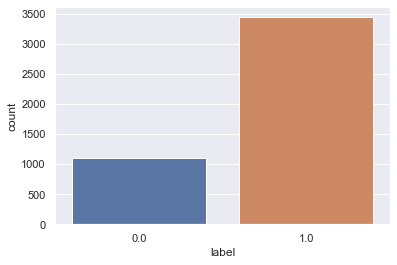

In [115]:
print("Proporsi label")
ax = sns.countplot(df['label'])

In [116]:
df['label'].value_counts()

1.0    3442
0.0    1106
Name: label, dtype: int64

In [117]:
# Bentuk VSM-nya
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(lowercase=True, smooth_idf= True, sublinear_tf=True, 
                                   ngram_range=(1, 2), max_df=0.90, min_df=2)

In [119]:
##TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim
#vectorizer = TfidfVectorizer(ngram_range=(1, 2))
vectorizer = TfidfVectorizer(max_df=0.1, min_df=5, ngram_range=(1, 2))

listdata=df['databersih'].values.astype('object')
listdata = [d for d in listdata]

listdata
v = TfidfVectorizer(decode_error='replace', encoding='utf-8')
tfidf = v.fit_transform(df['databersih'].values.astype('U'))
y = df.iloc[:, 2].values
print(tfidf.shape, len(y)) 

(4548, 13786) 4548


In [120]:
#balancing
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

oversampling_tf = SMOTE(sampling_strategy='all')

oversampling_tf.fit(tfidf,df['label'])

SMOTE(sampling_strategy='all')

In [122]:
fitur_tf, label_tf = oversampling_tf.fit_resample(tfidf,df['label'])
print(fitur_tf.shape)
print(label_tf.shape)

(6884, 13786)
(6884,)


In [124]:
from sklearn.model_selection import train_test_split
seed = 1
X = df['databersih'].values.astype('U')
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
X_train = vectorizer.fit_transform(X_train) # "Fit_Transform"
X_test = vectorizer.transform(X_test) # Perhatikan disini hanya "Transform"

print(X_train.shape, X_test.shape)

(3183, 2309) (1365, 2309)


In [125]:
def hapusKosong(X,y):
    y = y[X.getnnz(1)>0] # delete label dokumen yang memiliki row =0 di tfidf-nya
    X = X[X.getnnz(1)>0] # Remove Zero Rows
    return X, y

X_train, y_train = hapusKosong(X_train, y_train)
X_test, y_test = hapusKosong(X_test, y_test)
print(X_train.shape, X_test.shape)

(3173, 2309) (1361, 2309)


In [126]:
#svm
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

dSVM = svm.SVC( kernel = 'linear')
dSVM.fit(X_train, y_train)
y_SVM = dSVM.predict(X_test)
print('Akurasi = ', accuracy_score(y_test, y_SVM))
print(confusion_matrix(y_test, y_SVM))
print(classification_report(y_test, y_SVM))

Akurasi =  0.8221895664952241
[[126 212]
 [ 30 993]]
              precision    recall  f1-score   support

         0.0       0.81      0.37      0.51       338
         1.0       0.82      0.97      0.89      1023

    accuracy                           0.82      1361
   macro avg       0.82      0.67      0.70      1361
weighted avg       0.82      0.82      0.80      1361



In [127]:
from sklearn.linear_model import LogisticRegression
model_logreg = LogisticRegression(solver="lbfgs", multi_class="auto")
model_logreg.fit(X_train, y_train)
Y_pred = model_logreg.predict(X_test)
print("Accuracy:", accuracy_score(Y_pred, y_test))
print(confusion_matrix(y_test, Y_pred))
print(classification_report(y_test, Y_pred))

Accuracy: 0.8207200587803086
[[ 105  233]
 [  11 1012]]
              precision    recall  f1-score   support

         0.0       0.91      0.31      0.46       338
         1.0       0.81      0.99      0.89      1023

    accuracy                           0.82      1361
   macro avg       0.86      0.65      0.68      1361
weighted avg       0.84      0.82      0.79      1361



In [128]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_rf))
print(confusion_matrix(y_test, y_rf))
print(classification_report(y_test, y_rf))

Accuracy: 0.8258633357825128
[[158 180]
 [ 57 966]]
              precision    recall  f1-score   support

         0.0       0.73      0.47      0.57       338
         1.0       0.84      0.94      0.89      1023

    accuracy                           0.83      1361
   macro avg       0.79      0.71      0.73      1361
weighted avg       0.82      0.83      0.81      1361



Regresi Logistik [0.8207547169811321]
Random Forest [0.839622641509434]
SVM [0.8207547169811321]


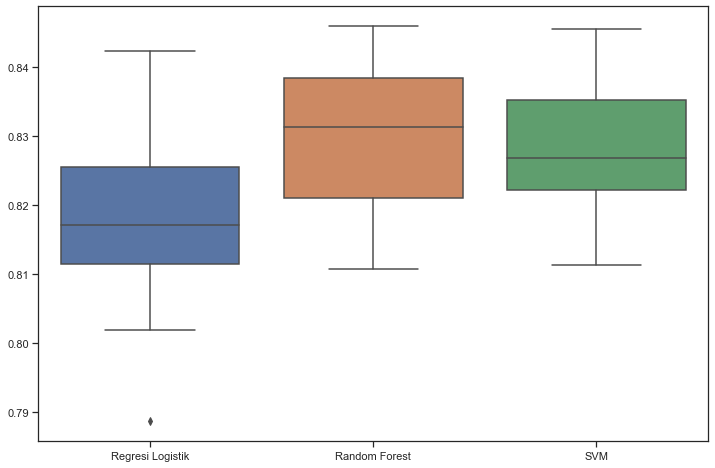

In [130]:
clf = LogisticRegression(solver='liblinear')
rf = RandomForestClassifier()
svm_ = svm.SVC()
Models = [('Regresi Logistik', clf), ('Random Forest', rf), ('SVM', svm_)]
Scores = {}
for model_name, model in Models:
    Scores[model_name] = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')

dt = pd.DataFrame.from_dict(Scores)
plt.figure(figsize=(12,8))
ax = sns.boxplot(data=dt)
for m, s in Scores.items():
    print(m,list(s)[:1])

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  10 out of  10 | elapsed:    9.7s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  10 out of  10 | elapsed:   11.6s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done  10 out of  10 | elapsed:    0.0s finished


Accuracy SVM: 0.83 (+/- 0.02)
Accuracy Rf: 0.83 (+/- 0.02)
Accuracy Reglog: 0.82 (+/- 0.03)


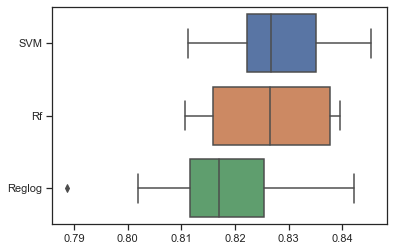

In [135]:
model_ = ["SVM", "Rf","Reglog"]

svm_score = cross_val_score(svm_, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-2, verbose=1)
Rf_score= cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-2, verbose=1)
clf_score= cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-2, verbose=1)
score_ = [ svm_score, Rf_score,clf_score]
data = {m:s for m,s in zip(model_, score_)}
for name in data.keys():
    print("Accuracy %s: %0.2f (+/- %0.2f)" % (name, data[name].mean(), data[name].std() * 2))
sns.boxplot(data=pd.DataFrame(data), orient='h')
plt.savefig("plot.png")

# cross val

In [136]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import make_pipeline 

In [137]:
parameters = [ {"n_estimators":[10,20,30,40], "max_depth":[4, 5, 10, 20, 100, 300, 500],"random_state":[0]}]
Rf = GridSearchCV(RandomForestClassifier(), parameters, cv=10, scoring = "accuracy")
Rf.fit(X_train, y_train)
print(Rf.best_estimator_)
print(Rf.best_score_)

RandomForestClassifier(max_depth=100, n_estimators=30, random_state=0)
0.8298146935698272


In [138]:
from sklearn.model_selection import GridSearchCV 
pipeSVM = make_pipeline(svm.SVC())
kCV = 10
# defining parameter range 
param_grid = {'C': [0.1,1, 5, 10],
              'kernel': ['linear']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train)

# print best parameter after tuning 
print("best parameters:",grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 

print("accuracy:",grid.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.770 total time=   1.2s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.769 total time=   1.2s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.769 total time=   1.2s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.773 total time=   1.1s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.767 total time=   1.1s
[CV 1/5] END ................C=1, kernel=linear;, score=0.836 total time=   1.1s
[CV 2/5] END ................C=1, kernel=linear;, score=0.836 total time=   1.1s
[CV 3/5] END ................C=1, kernel=linear;, score=0.831 total time=   1.0s
[CV 4/5] END ................C=1, kernel=linear;, score=0.822 total time=   1.1s
[CV 5/5] END ................C=1, kernel=linear;, score=0.828 total time=   1.1s
[CV 1/5] END ................C=5, kernel=linear;, score=0.783 total time=   1.0s
[CV 2/5] END ................C=5, kernel=linear;,

In [139]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("best parameters",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

best parameters {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.8187845961549908


# evaluasi model

In [140]:
svm_.fit(X_train, y_train)
y_pred = svm_.predict(X_test)
import sklearn
sklearn.metrics.accuracy_score(y_test, y_pred)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Akurasi : ', accuracy_score(y_test, y_pred))

[[ 119  219]
 [   8 1015]]
              precision    recall  f1-score   support

         0.0       0.94      0.35      0.51       338
         1.0       0.82      0.99      0.90      1023

    accuracy                           0.83      1361
   macro avg       0.88      0.67      0.71      1361
weighted avg       0.85      0.83      0.80      1361

Akurasi :  0.8332108743570904


In [141]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

import sklearn
sklearn.metrics.accuracy_score(y_test, y_pred)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Akurasi : ', accuracy_score(y_test, y_pred))

[[151 187]
 [ 55 968]]
              precision    recall  f1-score   support

         0.0       0.73      0.45      0.56       338
         1.0       0.84      0.95      0.89      1023

    accuracy                           0.82      1361
   macro avg       0.79      0.70      0.72      1361
weighted avg       0.81      0.82      0.81      1361

Akurasi :  0.8221895664952241


# confussion matrix

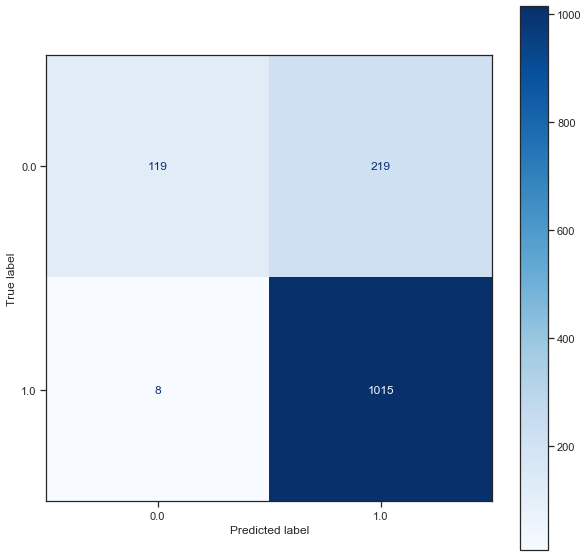

In [147]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(svm_, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
plt.savefig('confusion matrix.png')
plt.show()

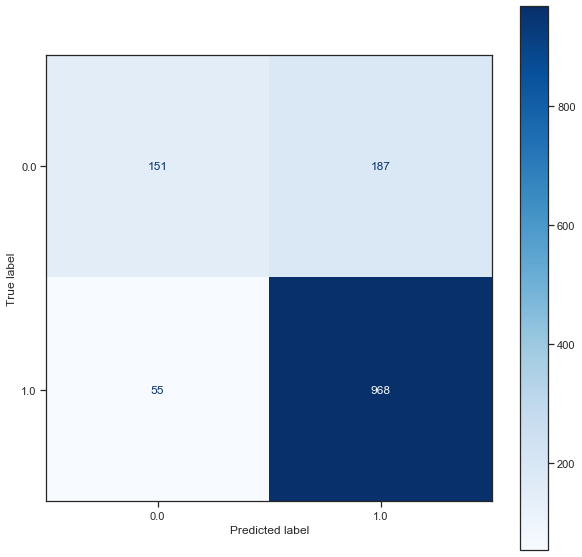

In [148]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
plt.savefig('confusion matrix.png')
plt.show()

# EDA

In [151]:
train.head()

,ID,label,tanggal,judul,narasi,nama file gambar,text
0,71,1,2020-08-17 00:00:00,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg,Pemakaian Masker Menyebabkan Penyakit Legionna...
1,495,1,2020-07-13 00:00:00,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,495.png,Foto Jim Rohn: Jokowi adalah presiden terbaik ...
2,550,1,2020-07-08 00:00:00,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",550.png,"ini bukan politik, tapi kenyataan Pak Jokowi b..."
3,1161,1,2020-05-05 00:00:00,MEREKA SUDAH MEMPERSIAPKAN DIRI DENGAN BAIK UN...,LIHATLAH MEREKA SUDAH MEMPERSIAPKAN DIRI DENGA...,1161.png,MEREKA SUDAH MEMPERSIAPKAN DIRI DENGAN BAIK UN...
4,1597,1,2020-03-24 00:00:00,Foto Presiden Italia menangis karena tak cukup...,Italia punya fasilitas perawatan kesehatan ter...,1597.png,Foto Presiden Italia menangis karena tak cukup...


Proporsi Label


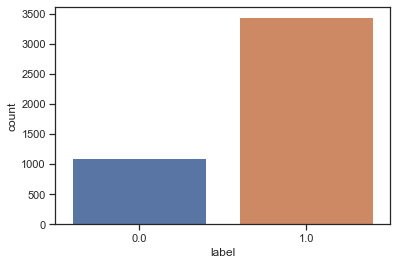

In [152]:
print("Proporsi Label")
ax = sns.countplot(df['label'])

In [153]:
df['label'].value_counts()

1.0    3442
0.0    1106
Name: label, dtype: int64

In [ ]:
df('type').country.value_counts()['TV Show'][:10].plot(kind='bar')